## LINGER  
LINGER (LIfelong neural Network for GEne Regulation) is a interpretable artificial intelligence model designed to analyze sc multiome data (RNA-seq count and chromatine accessbility count data that can subsequently be used for many downstream tasks.  

The advantages of LINGER are:  
1. incorporate large-scale external bulk data and neural networks  
2. integrate TF-RE motif matching knowledge  
3. high accuracy of gene regulatory network (GRN) inference  
4. enable the estimation of TF activity solely from gene expression data  

### Method overview  
LINGER uses neural network architectures to model transcriptional regulation, predicting target gene (TG) expression levels from transcription factor (TF) and regulatory element (RE) profiles. The loss function is compisosed of 3 parts:

1. Accuracy of prediction, MSE, L1 regularization
2. Elastic weight consolidation (EWC) loss of lifelong learning to incorporate large-scale external bulk data
3. LINGER integrates prior biological understanding of TF-RE interactions through manifold regularization.

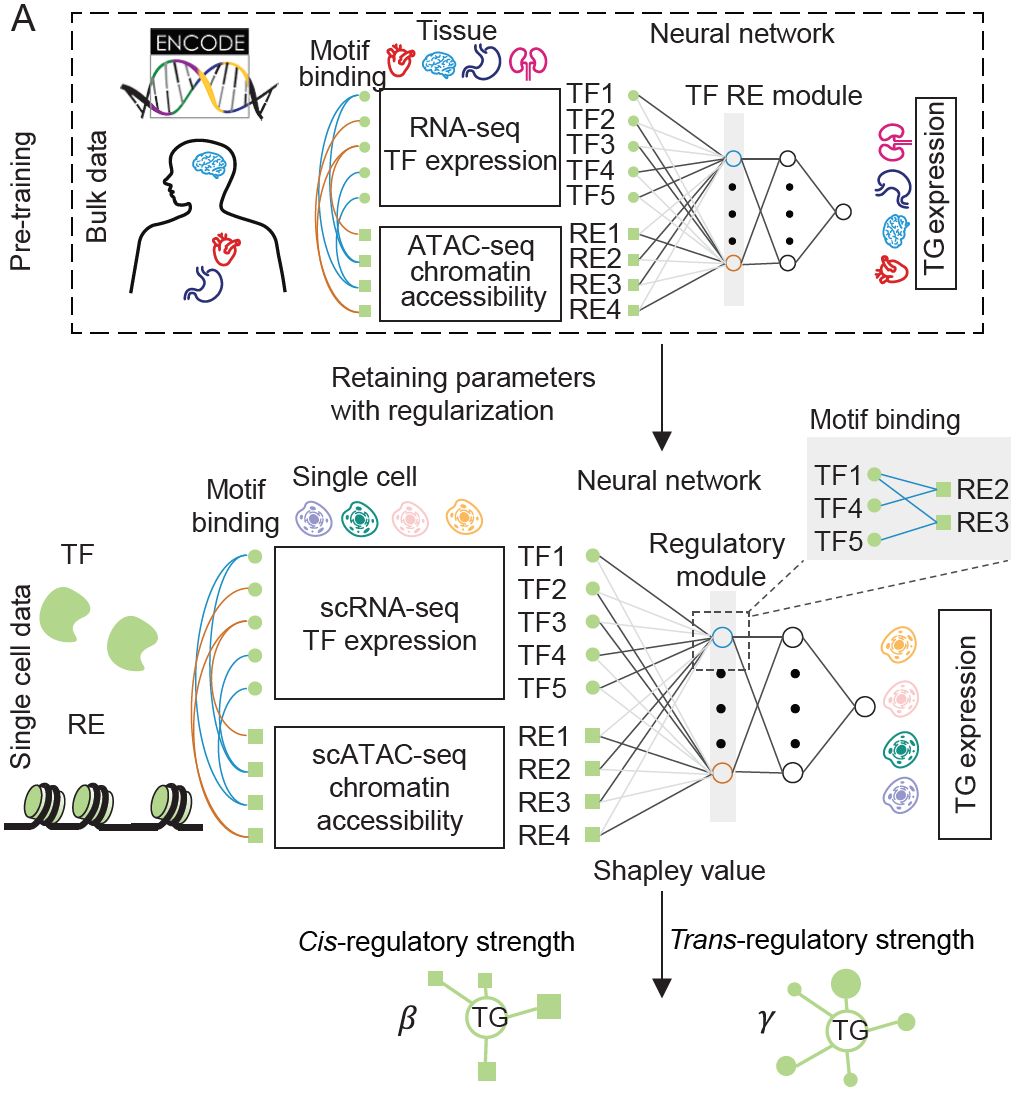

### Neuron network model structure
LINGER trains individual models for each gene using a neural network architecture that includes a single input layer and two fully connected hidden layers. The input layer has dimension equal to the number of features, containing all TFs and REs within 1Mb from the transcription start site (TSS) for the gene to be predicted. The first hidden layer has 64 neurons with rectified linear unit (ReLU) activation. The second hidden layer has 16 neurons with ReLU activation. The output layer is a single neuron, which outputs a real value for gene expression prediction.  
LINGER 采用神经网络架构，包括一个输入层和两个全连接的隐藏层，为每个基因训练单独的模型。输入层的维度等于特征的数量，包含要预测的基因的转录起始位点（TSS）1Mb 范围内的所有 TF 和 RE。第一隐藏层有 64 个神经元，采用整流线性单元（ReLU）激活。第二隐藏层有 16 个神经元，采用 ReLU 激活。输出层为单个神经元，输出实值用于基因表达预测。

### Tasks
#### Cell population gene regulatory network inference
We use the average of absolute Shapley value across samples to infer the regulation strength of TF and RE to target genes, generating the RE-TG cis-regulatory strength and the TF-TG trans-regulatory strength. To generate the TF-RE binding strength, we use the weights from input layer (TFs and REs) to all node in the second layer of the NN model as the embedding of the TF or RE. The TF-RE binding strength is calculated by the PCC between the TF and RE based on the embedding.

#### Cell type specific gene regulatory network
After constructing the GRNs for cell population, we infer the cell type specific one using the feature engineering approach. Just as the following figure, we combine the single cell data (
O,E, and C in the figure) and the prior gene regulatory network structure with the parameter α,β,d,B, and γ.
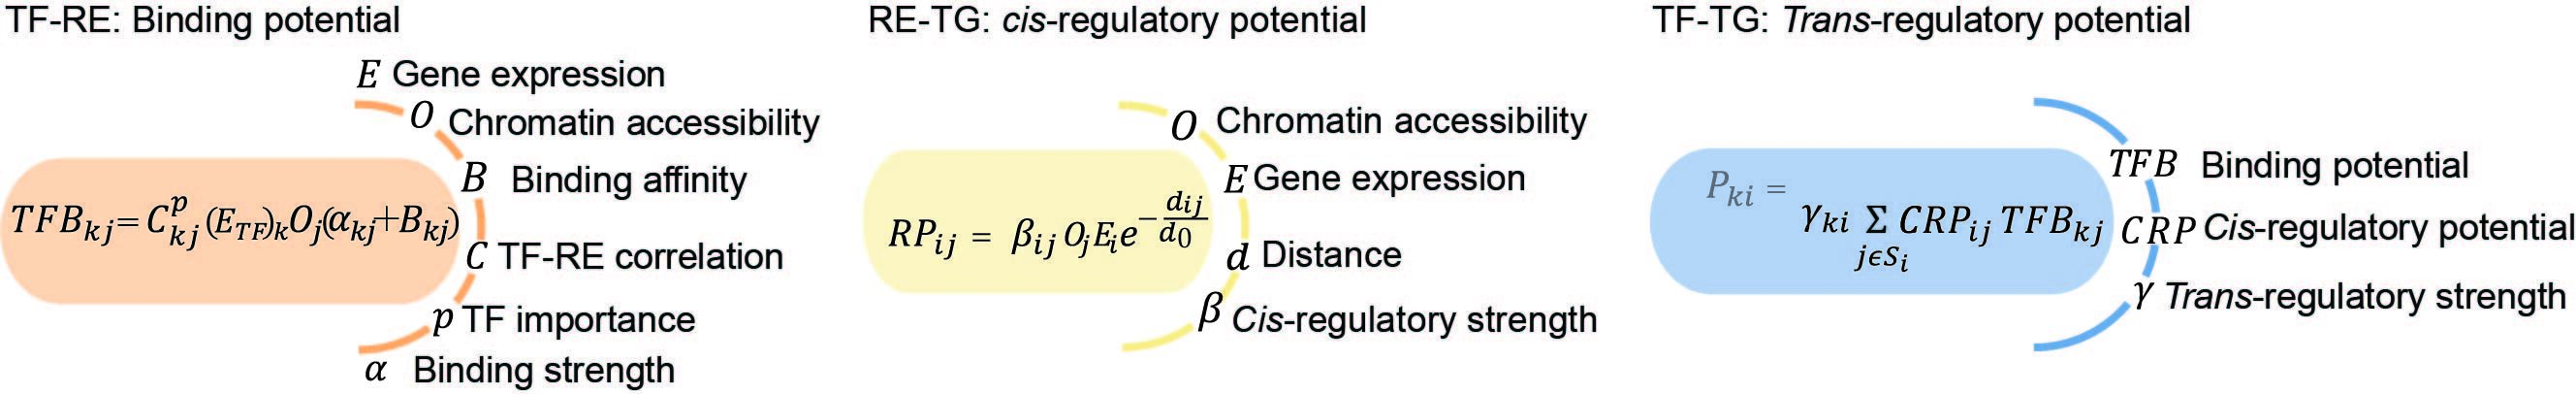

#### Benchmark gene regulatory network
We systematically assess the performance of the GRN by the metrics, AUC and AUPR ratio.

1. trans: the ground truth include and knock down
2. cis: the ground truth is HiC and eQTL
3. TF-RE: the ground truth is ChIP-seq data from

#### Transcription factor activity
Assuming the GRN structure is consistent across individuals, we employ LINGER inferred GRNs from sc-multiome data of a single individual to estimated TF activity using gene expression data alone from same or other individuals. By comparing TF activity between cases and controls, we identified driver regulators.

#### In silico pertubation
We predict the gene expression when knock out one TF or several TFs together. Then we could predict the target gene after the perturbation.

## Tutorials
1. PBMCs
2. H1 cell line
3. Non-human species